# Temperature Forecast

## Data description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

## Attribute information

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading csv file 

In [37]:
df = pd.read_csv('Temperature forecast.csv', index_col='Date', parse_dates=['Date'])
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null

In [4]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

## EDA

### Checking for null values

<AxesSubplot:ylabel='Date'>

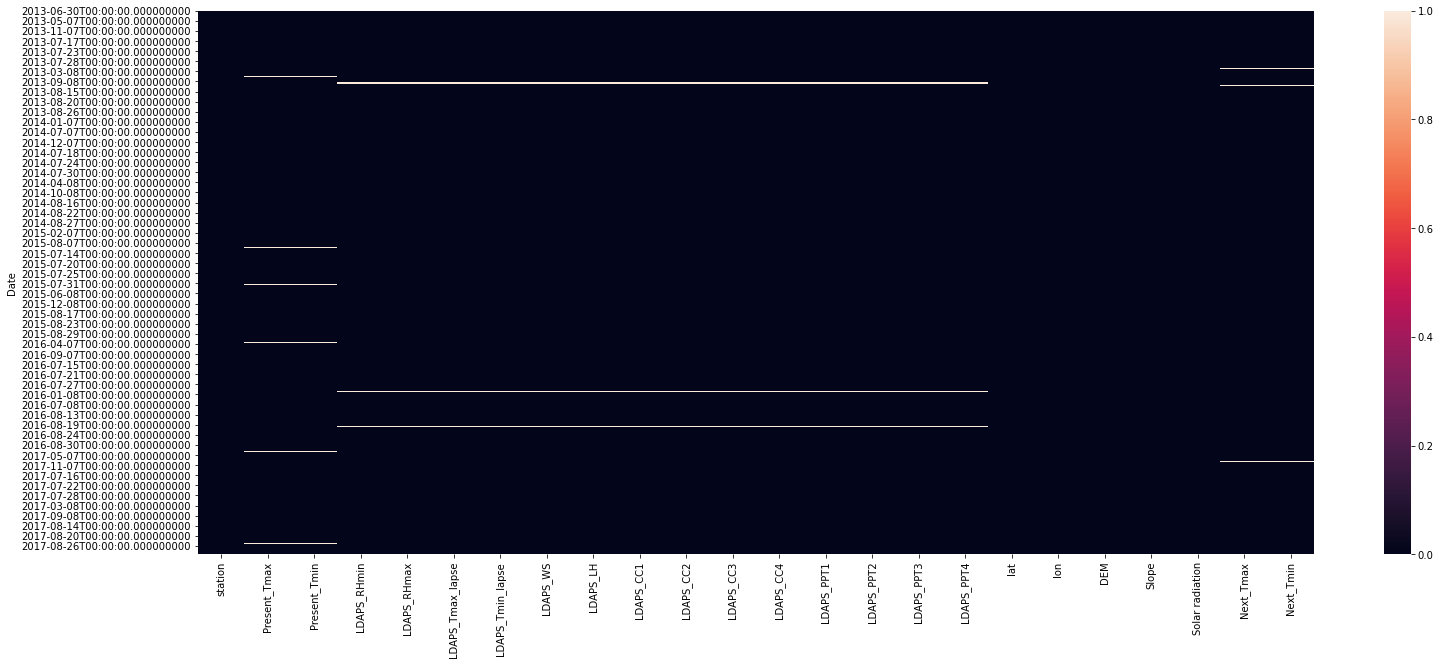

In [10]:
# plotting heatmap to find the null values.

plt.figure(figsize=(25,10))
sns.heatmap(df.isnull())

In [160]:
# total number of null values present in column.

df.isnull().sum()

station              2
Present_Tmax         0
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [38]:
# removing the nan values present in each column.

for col in df.columns:
    value = df[col].median()
    df[col] = df[col].replace(np.nan, value)

### Dependent variable visualisation

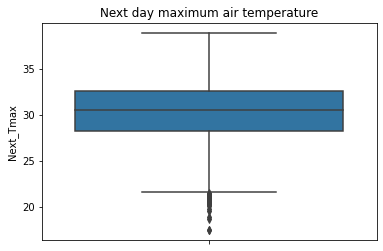

In [7]:
# checking box plot for target variable Next_Tmax.

plt.title('Next day maximum air temperature')
sns.boxplot(y = df['Next_Tmax'])
plt.show()

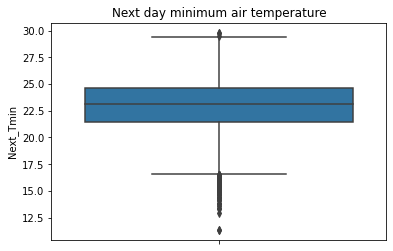

In [6]:
# checking boxplot for target variable Next_Tmin.

plt.title('Next day minimum air temperature')
sns.boxplot(y = df['Next_Tmin'])
plt.show()

* As we can see that outliers are present in both of our target variable. And we need to remove it.

In [39]:
# removing outliers from target variable

def remove_outlier(df):
    for x in df:
        print('Removing outliers from {}'.format(x))
        percentile = df[x].quantile([0.10,0.90]).values
        df[x] = np.where(df[x] < percentile[0], percentile[0], df[x])
        df[x] = np.where(df[x] > percentile[1], percentile[1], df[x])
    return df
df[['Next_Tmax', 'Next_Tmin']] = remove_outlier(df[['Next_Tmax', 'Next_Tmin']])

Removing outliers from Next_Tmax
Removing outliers from Next_Tmin


<AxesSubplot:ylabel='Density'>

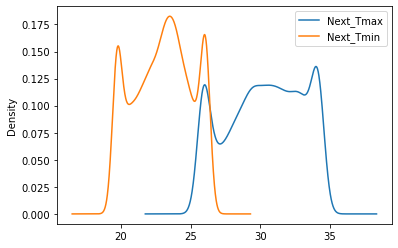

In [8]:
# checking the density of both the target variable.

df[['Next_Tmax', 'Next_Tmin']].plot(kind='density')

### checking correlation value and linearity with the target variable Next_Tmax 

In [40]:
# importing personr from scipy to calculate the linear correlation.

import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis, y_axis):
    sns.pairplot(df, x_vars=x_axis, y_vars=y_axis, height=4, aspect=1, kind='scatter')
    plt.show()

In [10]:
y_vars = ['Next_Tmax']

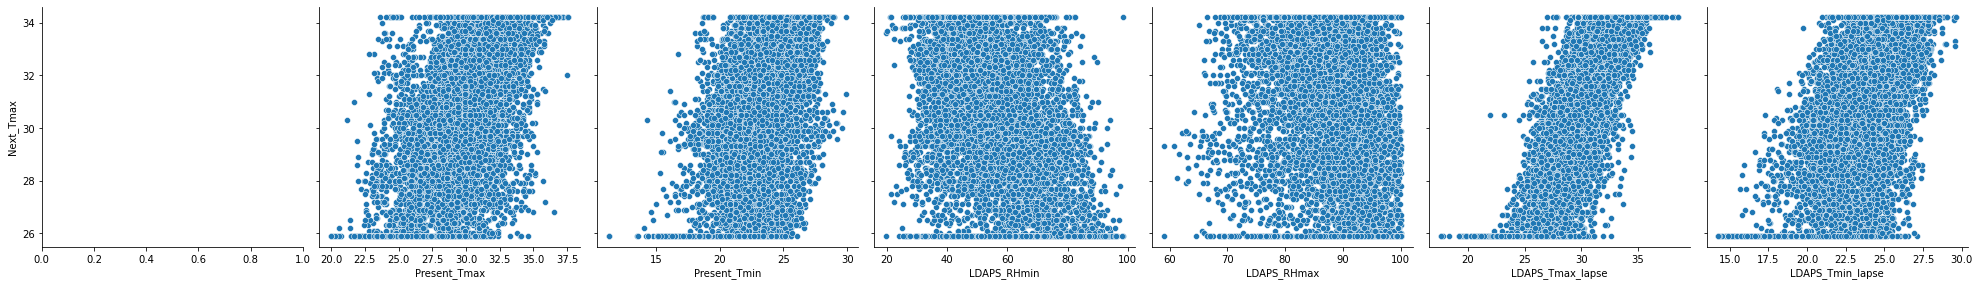


 Coeffiecient of correlation between Present_Tmax and Next_Tmax: 58.7462742279292 %

 Coeffiecient of correlation between Present_Tmin and Next_Tmax: 44.79735079072872 %

 Coeffiecient of correlation between LDAPS_RHmin and Next_Tmax: -44.11290507582877 %

 Coeffiecient of correlation between LDAPS_RHmax and Next_Tmax: -28.116117892897112 %

 Coeffiecient of correlation between LDAPS_Tmax_lapse and Next_Tmax: 80.52526194294902 %

 Coeffiecient of correlation between LDAPS_Tmin_lapse and Next_Tmax: 55.78922088943447 %


In [13]:
x_vars = ['','Present_Tmax' ,'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']
pairplot(x_vars, y_vars)

p1 = df['Present_Tmax']
p2 = df['Present_Tmin']
p3 = df['LDAPS_RHmin']
p4 = df['LDAPS_RHmax']
p5 = df['LDAPS_Tmax_lapse']
p6 = df['LDAPS_Tmin_lapse']


pearson_coeff, p_value = pearsonr(p1, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[1],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[2],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[3],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p4, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[4],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p5, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[5],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p6, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[6],y_vars[0]), pearson_coeff*100,'%')

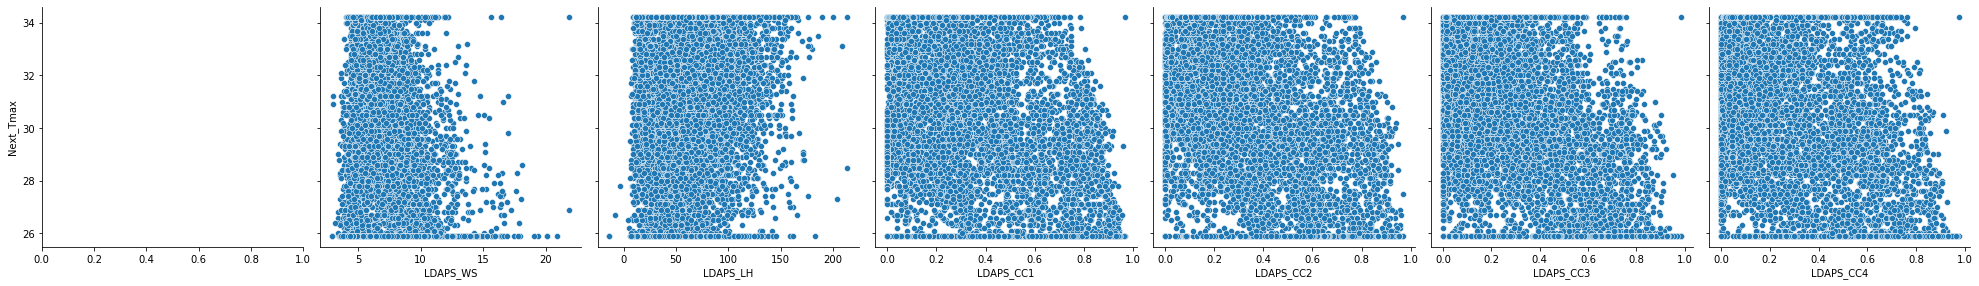


 Coeffiecient of correlation between LDAPS_WS and Next_Tmax: -33.42443871392141 %

 Coeffiecient of correlation between LDAPS_LH and Next_Tmax: 16.0037184001453 %

 Coeffiecient of correlation between LDAPS_CC1 and Next_Tmax: -45.20393414336504 %

 Coeffiecient of correlation between LDAPS_CC2 and Next_Tmax: -49.01613413796376 %

 Coeffiecient of correlation between LDAPS_CC3 and Next_Tmax: -51.670439703645464 %

 Coeffiecient of correlation between LDAPS_CC4 and Next_Tmax: -45.23045589242912 %


In [14]:
x_vars = ['', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']
pairplot(x_vars, y_vars)

p1 = df['LDAPS_WS']
p2 = df['LDAPS_LH']
p3 = df['LDAPS_CC1']
p4 = df['LDAPS_CC2']
p5 = df['LDAPS_CC3']
p6 = df['LDAPS_CC4']


pearson_coeff, p_value = pearsonr(p1, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[1],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[2],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[3],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p4, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[4],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p5, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[5],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p6, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[6],y_vars[0]), pearson_coeff*100,'%')

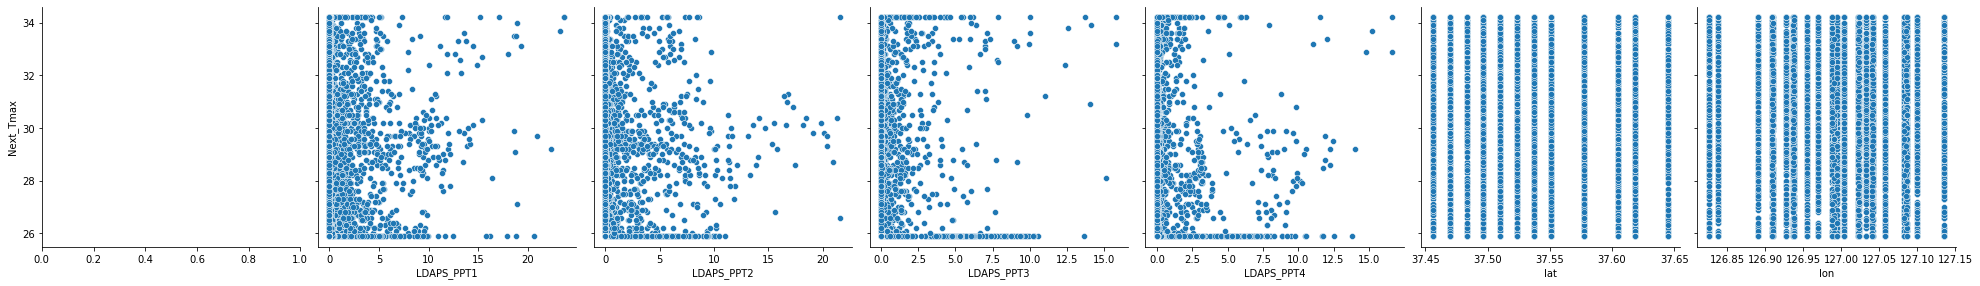


 Coeffiecient of correlation between LDAPS_PPT1 and Next_Tmax: -13.339541354482837 %

 Coeffiecient of correlation between LDAPS_PPT2 and Next_Tmax: -17.72985057451707 %

 Coeffiecient of correlation between LDAPS_PPT3 and Next_Tmax: -16.116095531221657 %

 Coeffiecient of correlation between LDAPS_PPT4 and Next_Tmax: -16.89300313238208 %

 Coeffiecient of correlation between lat and Next_Tmax: -4.706165612112157 %

 Coeffiecient of correlation between lon and Next_Tmax: 0.35784793507010715 %


In [15]:
x_vars = ['', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon']
pairplot(x_vars, y_vars)

p1 = df['LDAPS_PPT1']
p2 = df['LDAPS_PPT2']
p3 = df['LDAPS_PPT3']
p4 = df['LDAPS_PPT4']
p5 = df['lat']
p6 = df['lon']


pearson_coeff, p_value = pearsonr(p1, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[1],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[2],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[3],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p4, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[4],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p5, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[5],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p6, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[6],y_vars[0]), pearson_coeff*100,'%')

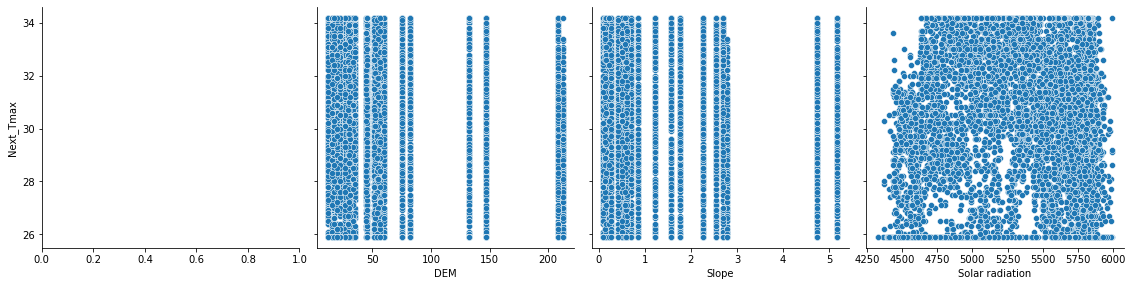


 Coeffiecient of correlation between DEM and Next_Tmax: -16.227317613898006 %

 Coeffiecient of correlation between Slope and Next_Tmax: -9.998538207087543 %

 Coeffiecient of correlation between Solar radiation and Next_Tmax: -0.7074967328815518 %


In [11]:
x_vars = ['', 'DEM', 'Slope', 'Solar radiation']
pairplot(x_vars, y_vars)

p1 = df['DEM']
p2 = df['Slope']
p3 = df['Solar radiation']

pearson_coeff, p_value = pearsonr(p1, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[1],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[2],y_vars[0]), pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['Next_Tmax'])
print('\n Coeffiecient of correlation between {} and {}:'.format(x_vars[3],y_vars[0]), pearson_coeff*100,'%')

### Note:-

* The correlation value with lower negative value shows negative correlation.
* The correlation value with higher positive value shows positive correlation.
* The correlation value close to 0 show no correlation.

<Figure size 1440x360 with 0 Axes>

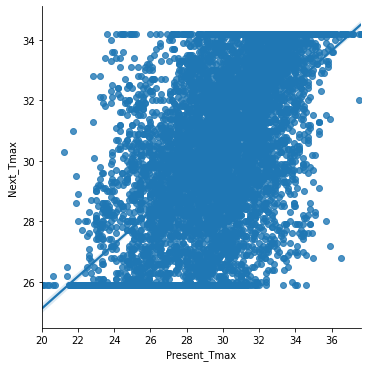

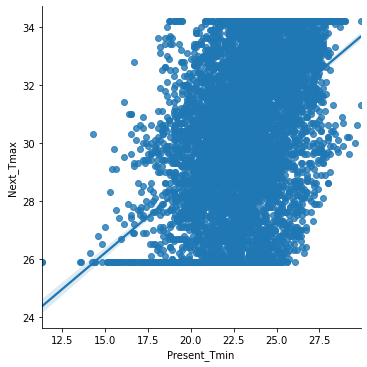

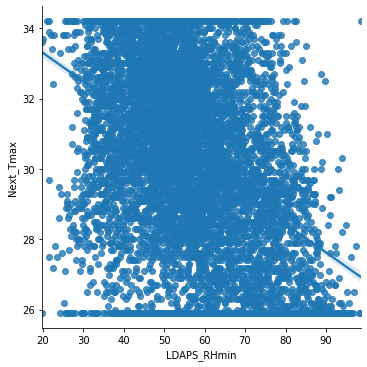

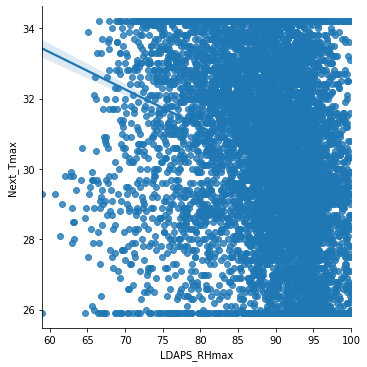

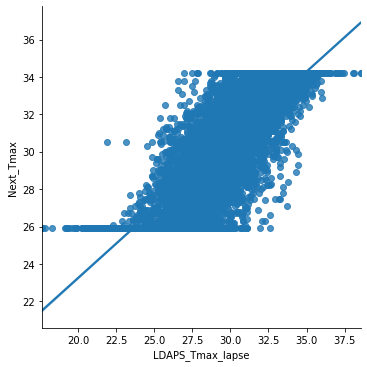

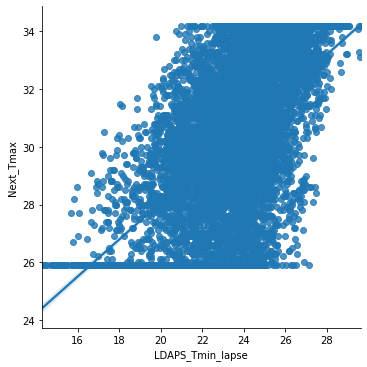

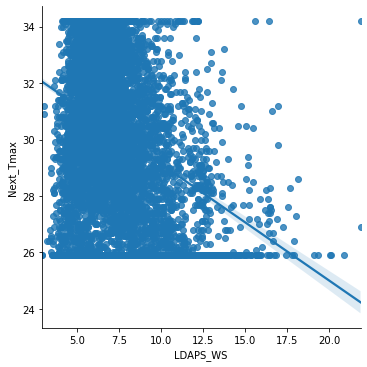

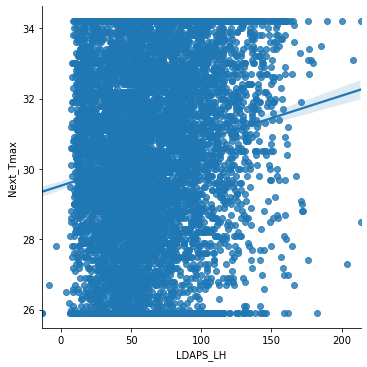

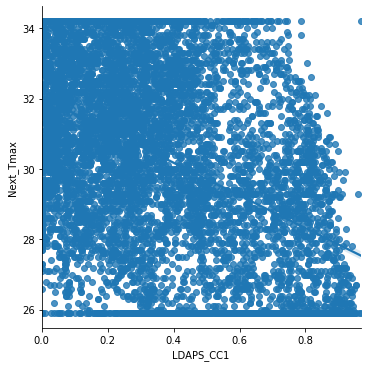

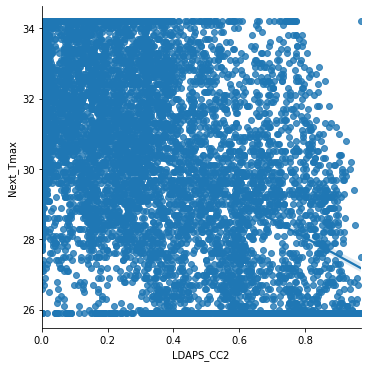

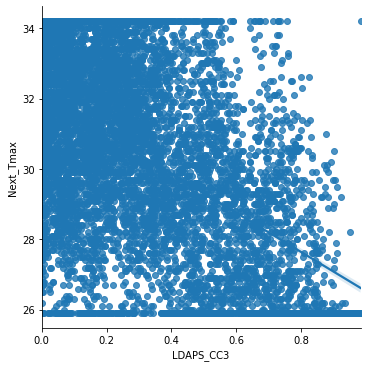

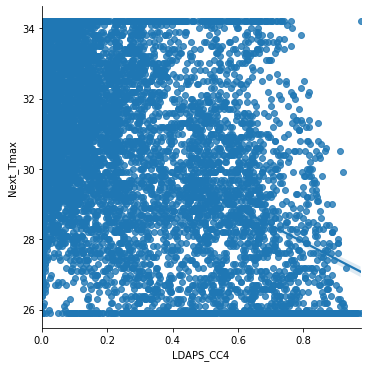

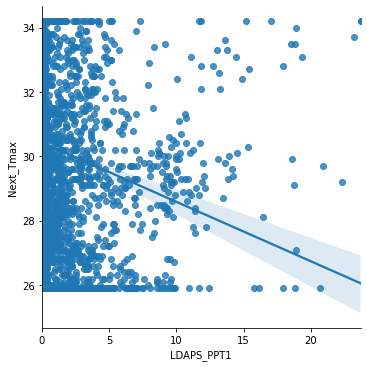

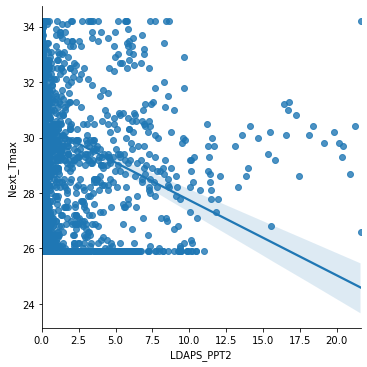

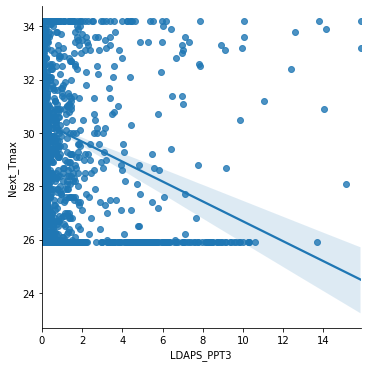

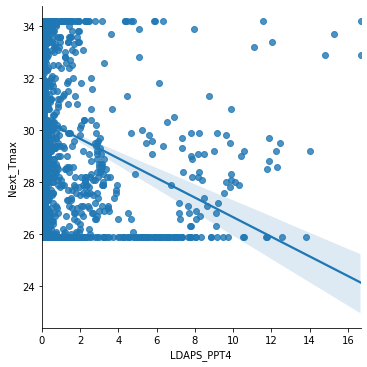

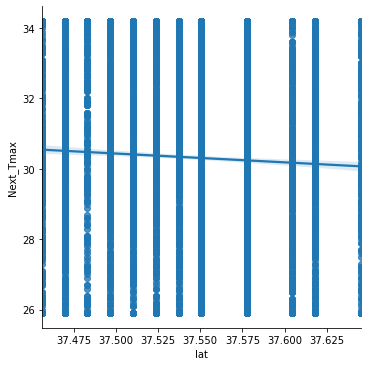

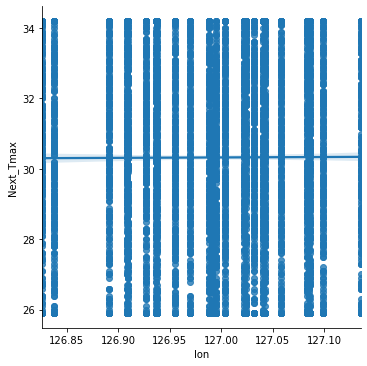

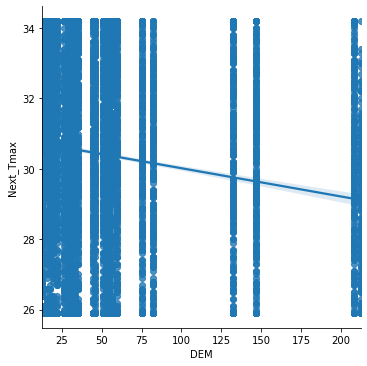

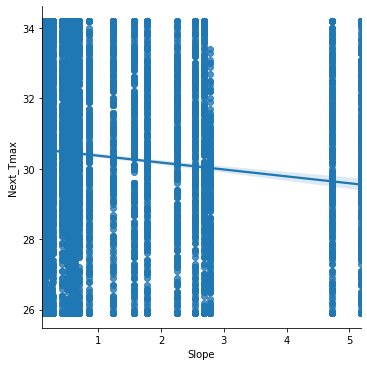

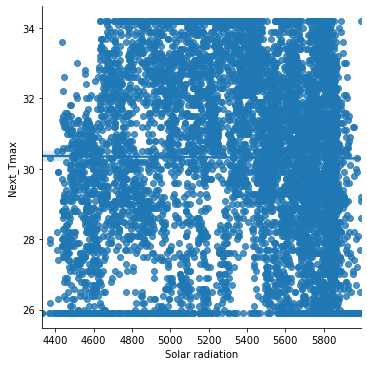

In [12]:
# this is a linera model plot.
# checking the regression line between dependent variable(Next_Tmax) and independent variables.

plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='Present_Tmax', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='Present_Tmin', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmin', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmax', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmax_lapse', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmin_lapse', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_WS', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_LH', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC1', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC2', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC3', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC4', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT1', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT2', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT3', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT4', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='lat', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='lon', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='DEM', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='Slope', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='Solar radiation', y='Next_Tmax', fit_reg=True)

<Figure size 1440x360 with 0 Axes>

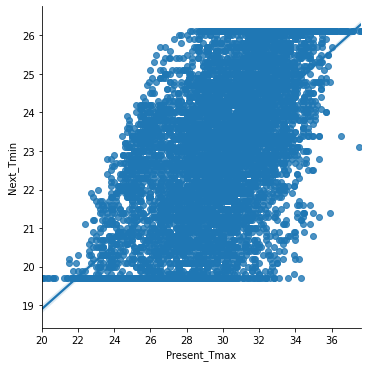

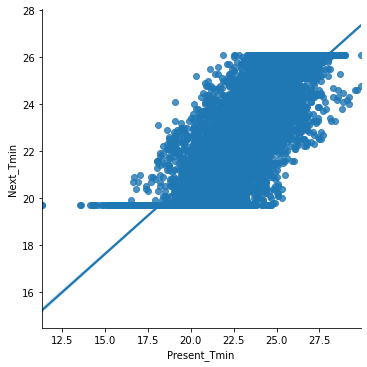

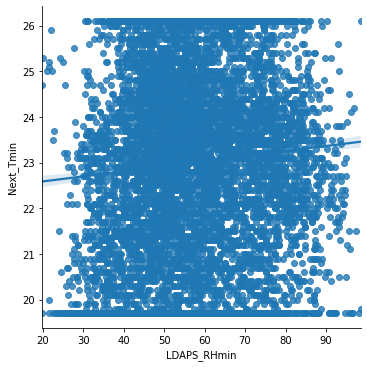

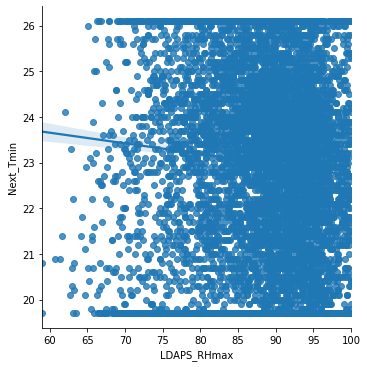

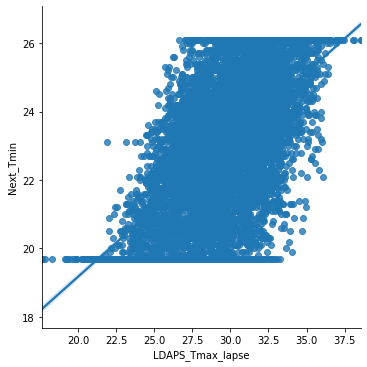

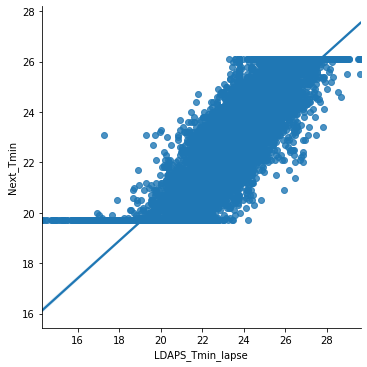

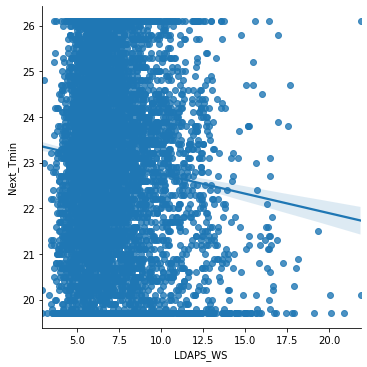

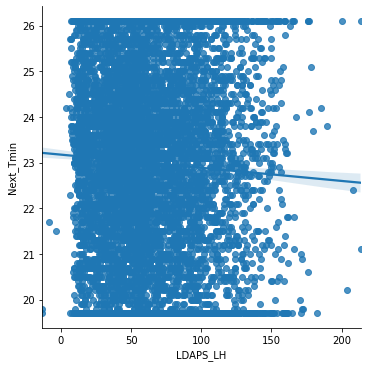

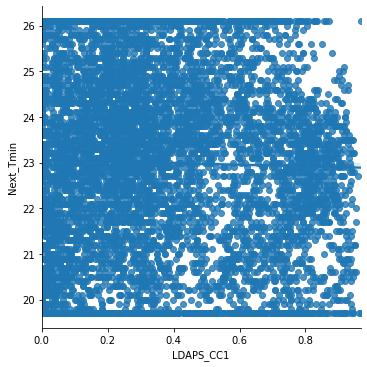

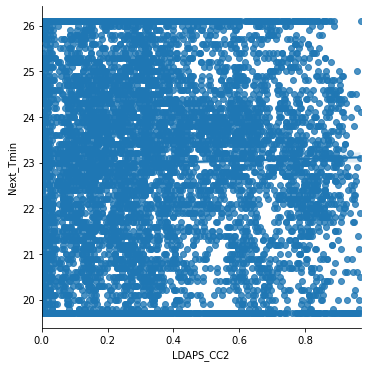

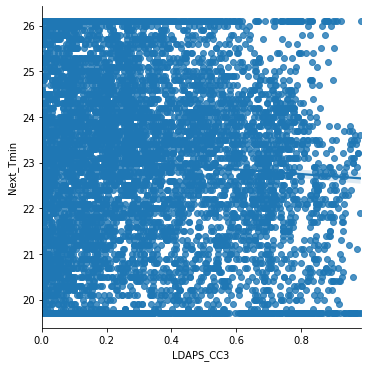

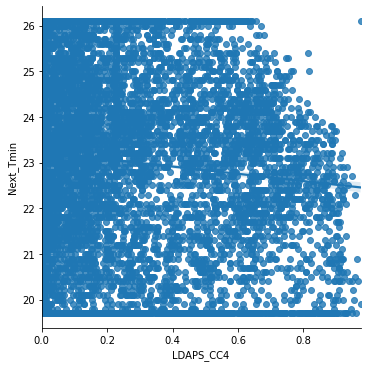

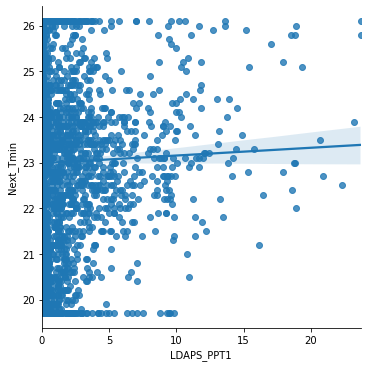

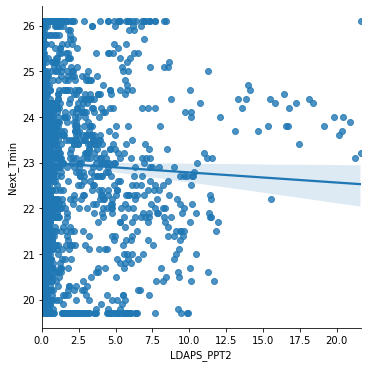

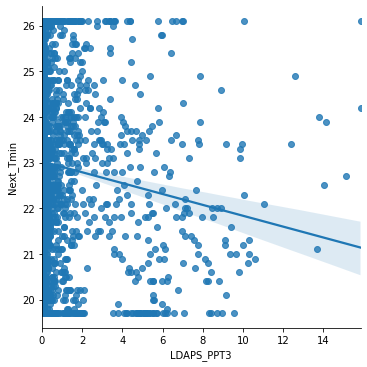

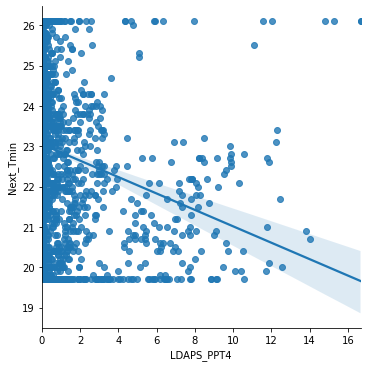

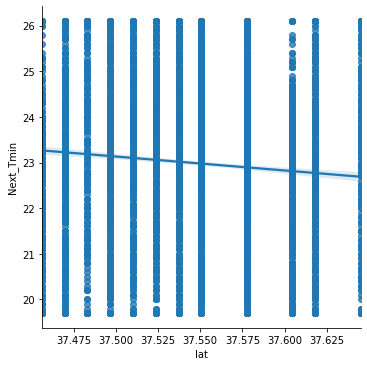

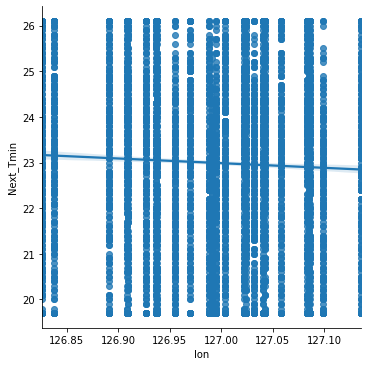

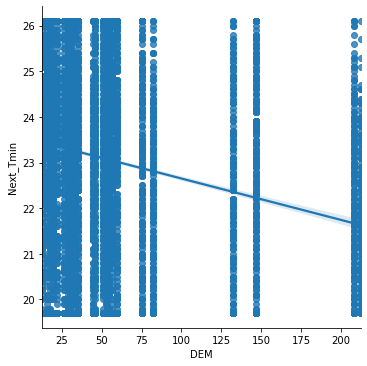

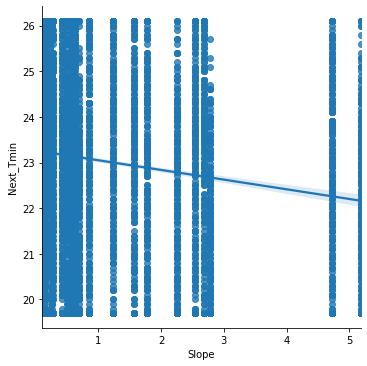

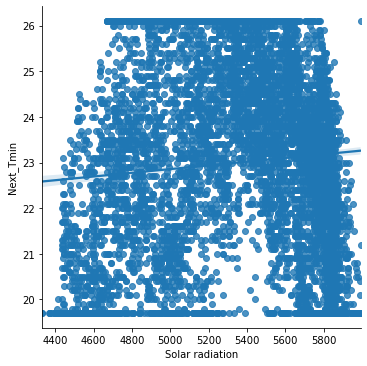

In [27]:
# this is a linera model plot.
# checking the regression line between dependent variable(Next_Tmin) and independent variable.

plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='Present_Tmax', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='Present_Tmin', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmin', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmax', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmax_lapse', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmin_lapse', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_WS', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_LH', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC1', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC2', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC3', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC4', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT1', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT2', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT3', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT4', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='lat', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='lon', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='DEM', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='Slope', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='Solar radiation', y='Next_Tmin', fit_reg=True)

### Checking for skewness in data

In [28]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)

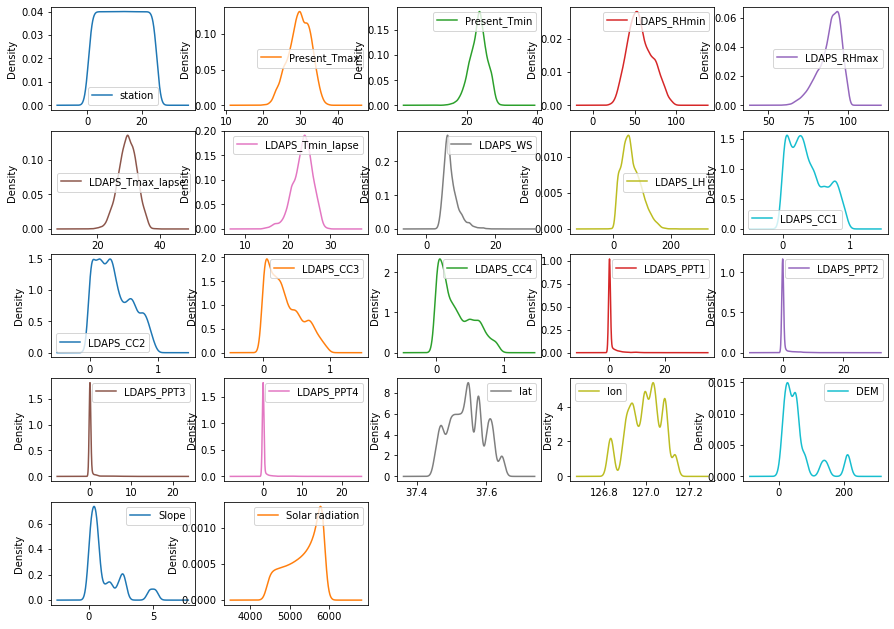

In [29]:
# checking the distribution plot.

x.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=True, figsize=(15,11))
plt.show()

* We can check the distribution of each independent variable.
* The skewness is not more or less than +/-3.

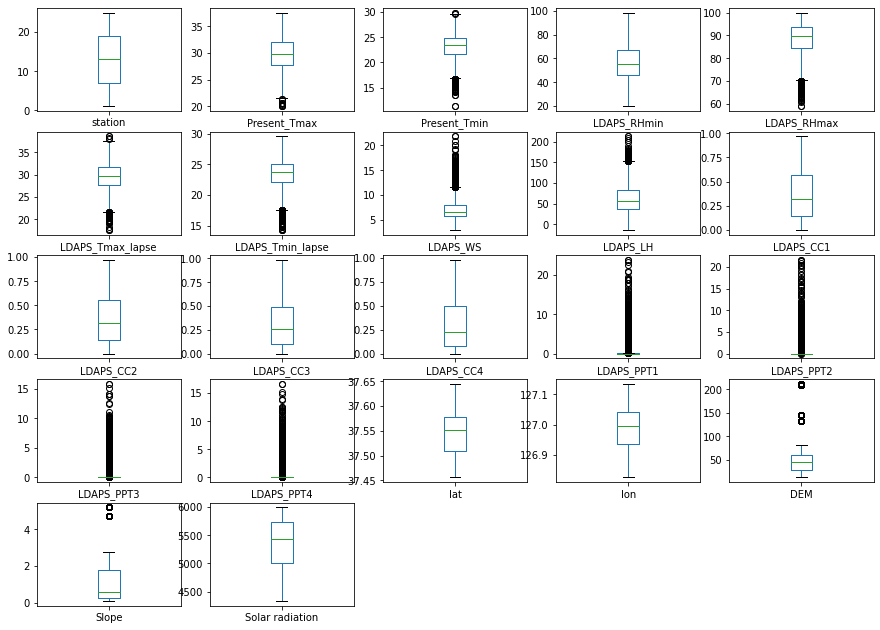

In [32]:
# checking boxplot for outliers.

x.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=True, figsize=(15,11))
plt.show()

* As we can see in LDAPS_PPT1 to LDAPS_PPT4 the box plot is more concentrated in 0, this is because the precipitaion in area
is very less.
* Present_Tmax and Present_Tmin correspond to the present day air temperature, the maximum air temp lies between 20 to 37.9
and minimum air temp lies between 11.3 to 29.9. Hence there is no ooutliers present in this column.
* All the columns are correct according to the value given for each column.
* And hence we can say that the points which are below or above th whiskers are not the outliers.

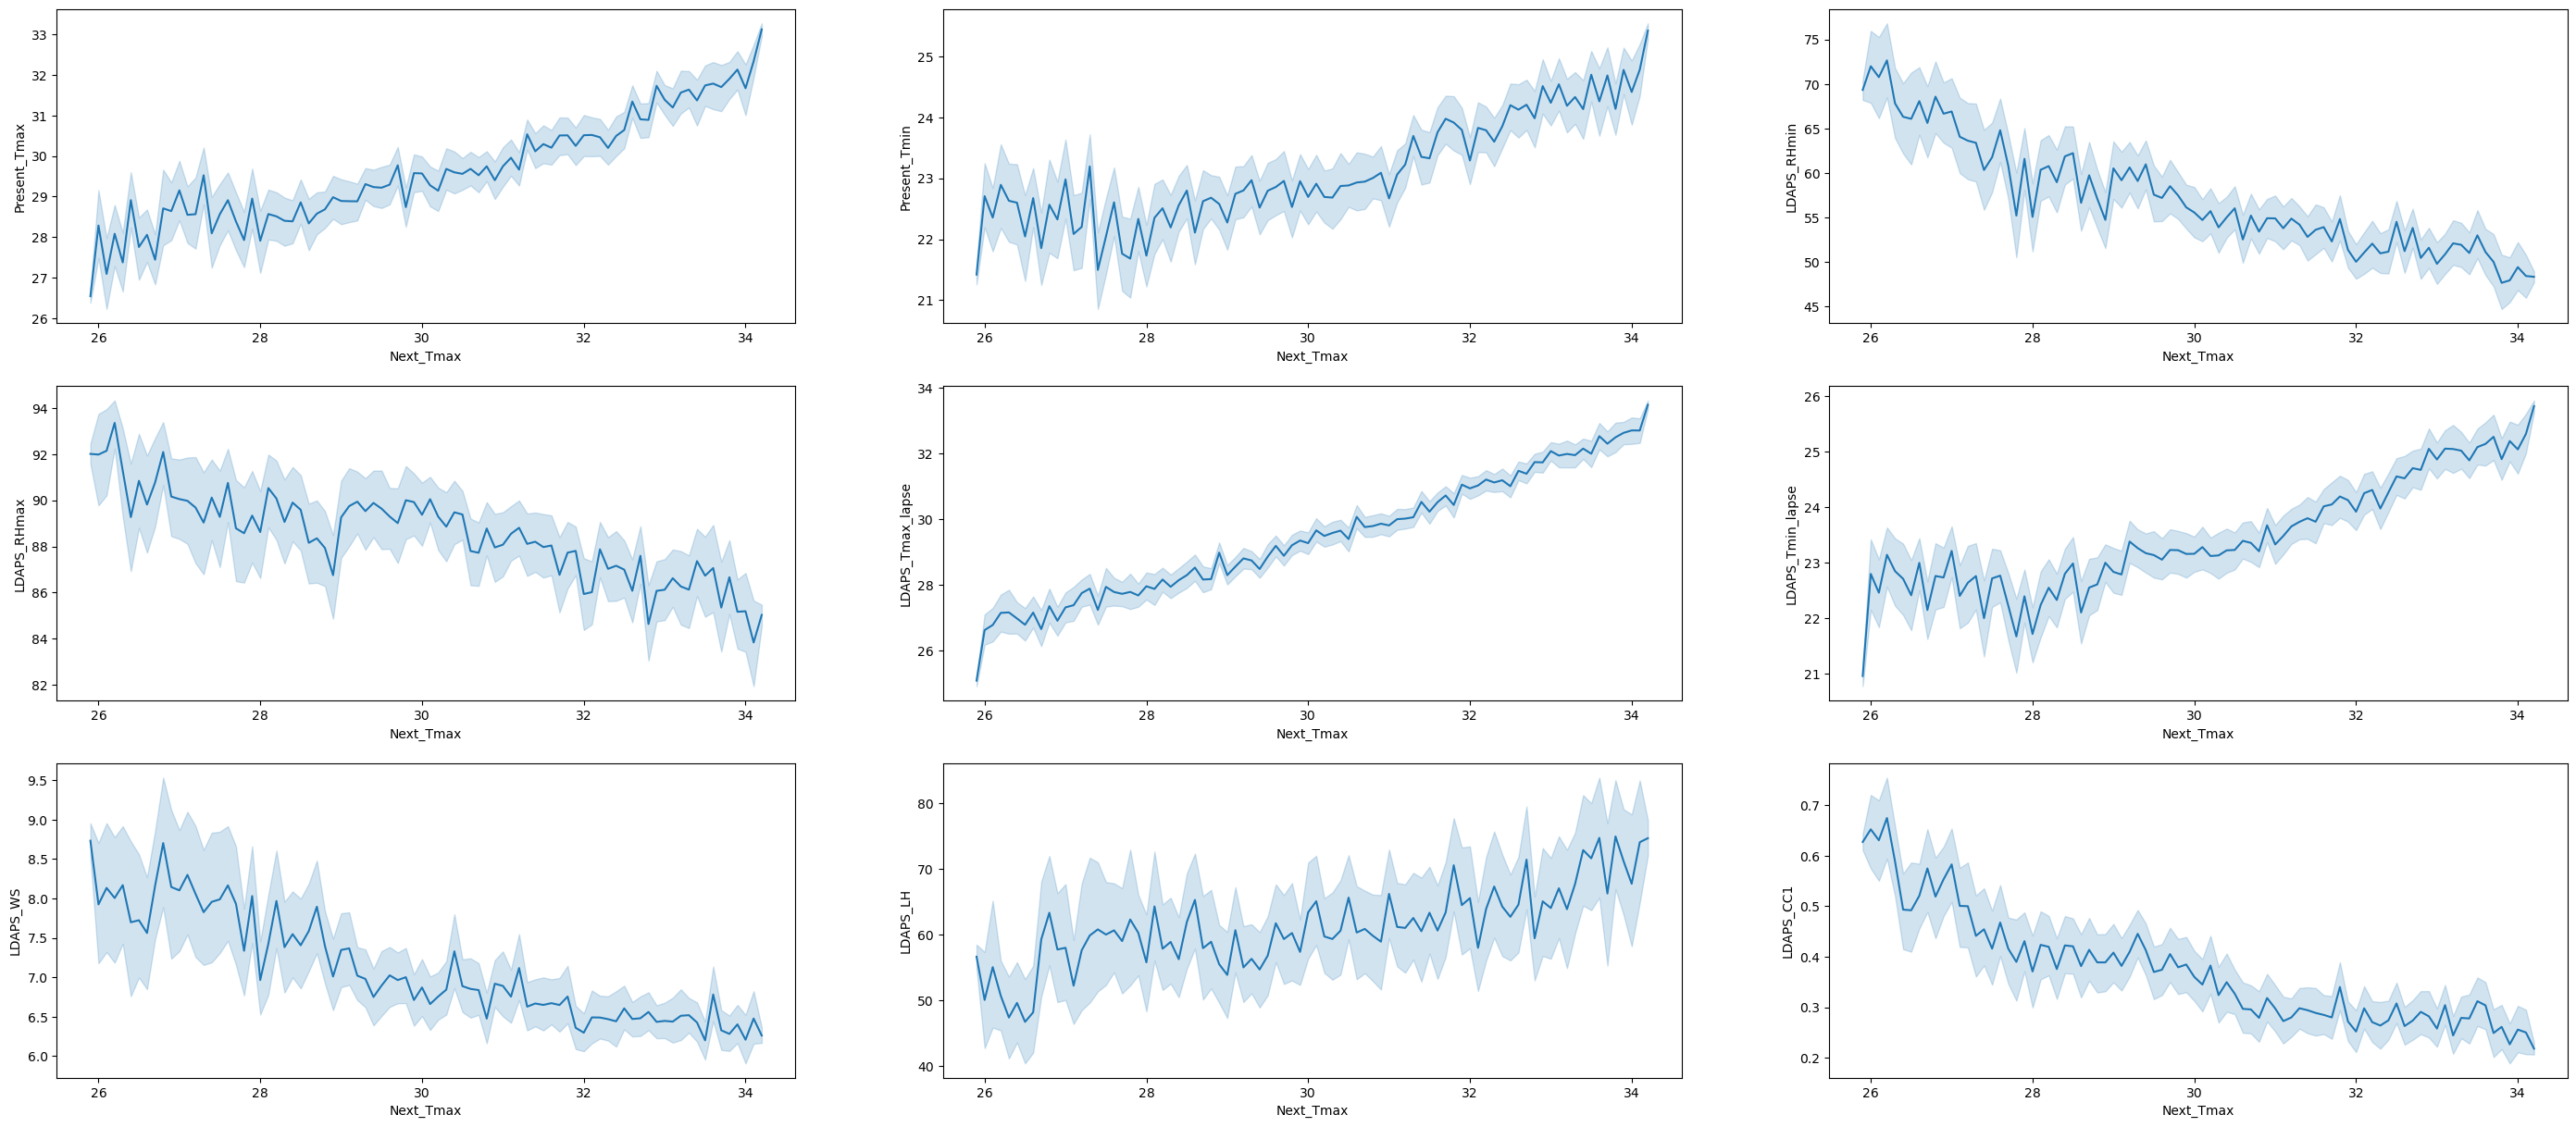

In [146]:
fig,ax=plt.subplots(3,3,figsize=(35,15))
sns.lineplot(y=df['Present_Tmax'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['Present_Tmin'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['LDAPS_RHmin'], x=df['Next_Tmax'],ax=ax[0,2])
sns.lineplot(y=df['LDAPS_RHmax'], x=df['Next_Tmax'],ax=ax[1,0])
sns.lineplot(y=df['LDAPS_Tmax_lapse'], x=df['Next_Tmax'],ax=ax[1,1])
sns.lineplot(y=df['LDAPS_Tmin_lapse'], x=df['Next_Tmax'],ax=ax[1,2])
sns.lineplot(y=df['LDAPS_WS'], x=df['Next_Tmax'],ax=ax[2,0])
sns.lineplot(y=df['LDAPS_LH'], x=df['Next_Tmax'],ax=ax[2,1])
sns.lineplot(y=df['LDAPS_CC1'], x=df['Next_Tmax'],ax=ax[2,2])
plt.show()

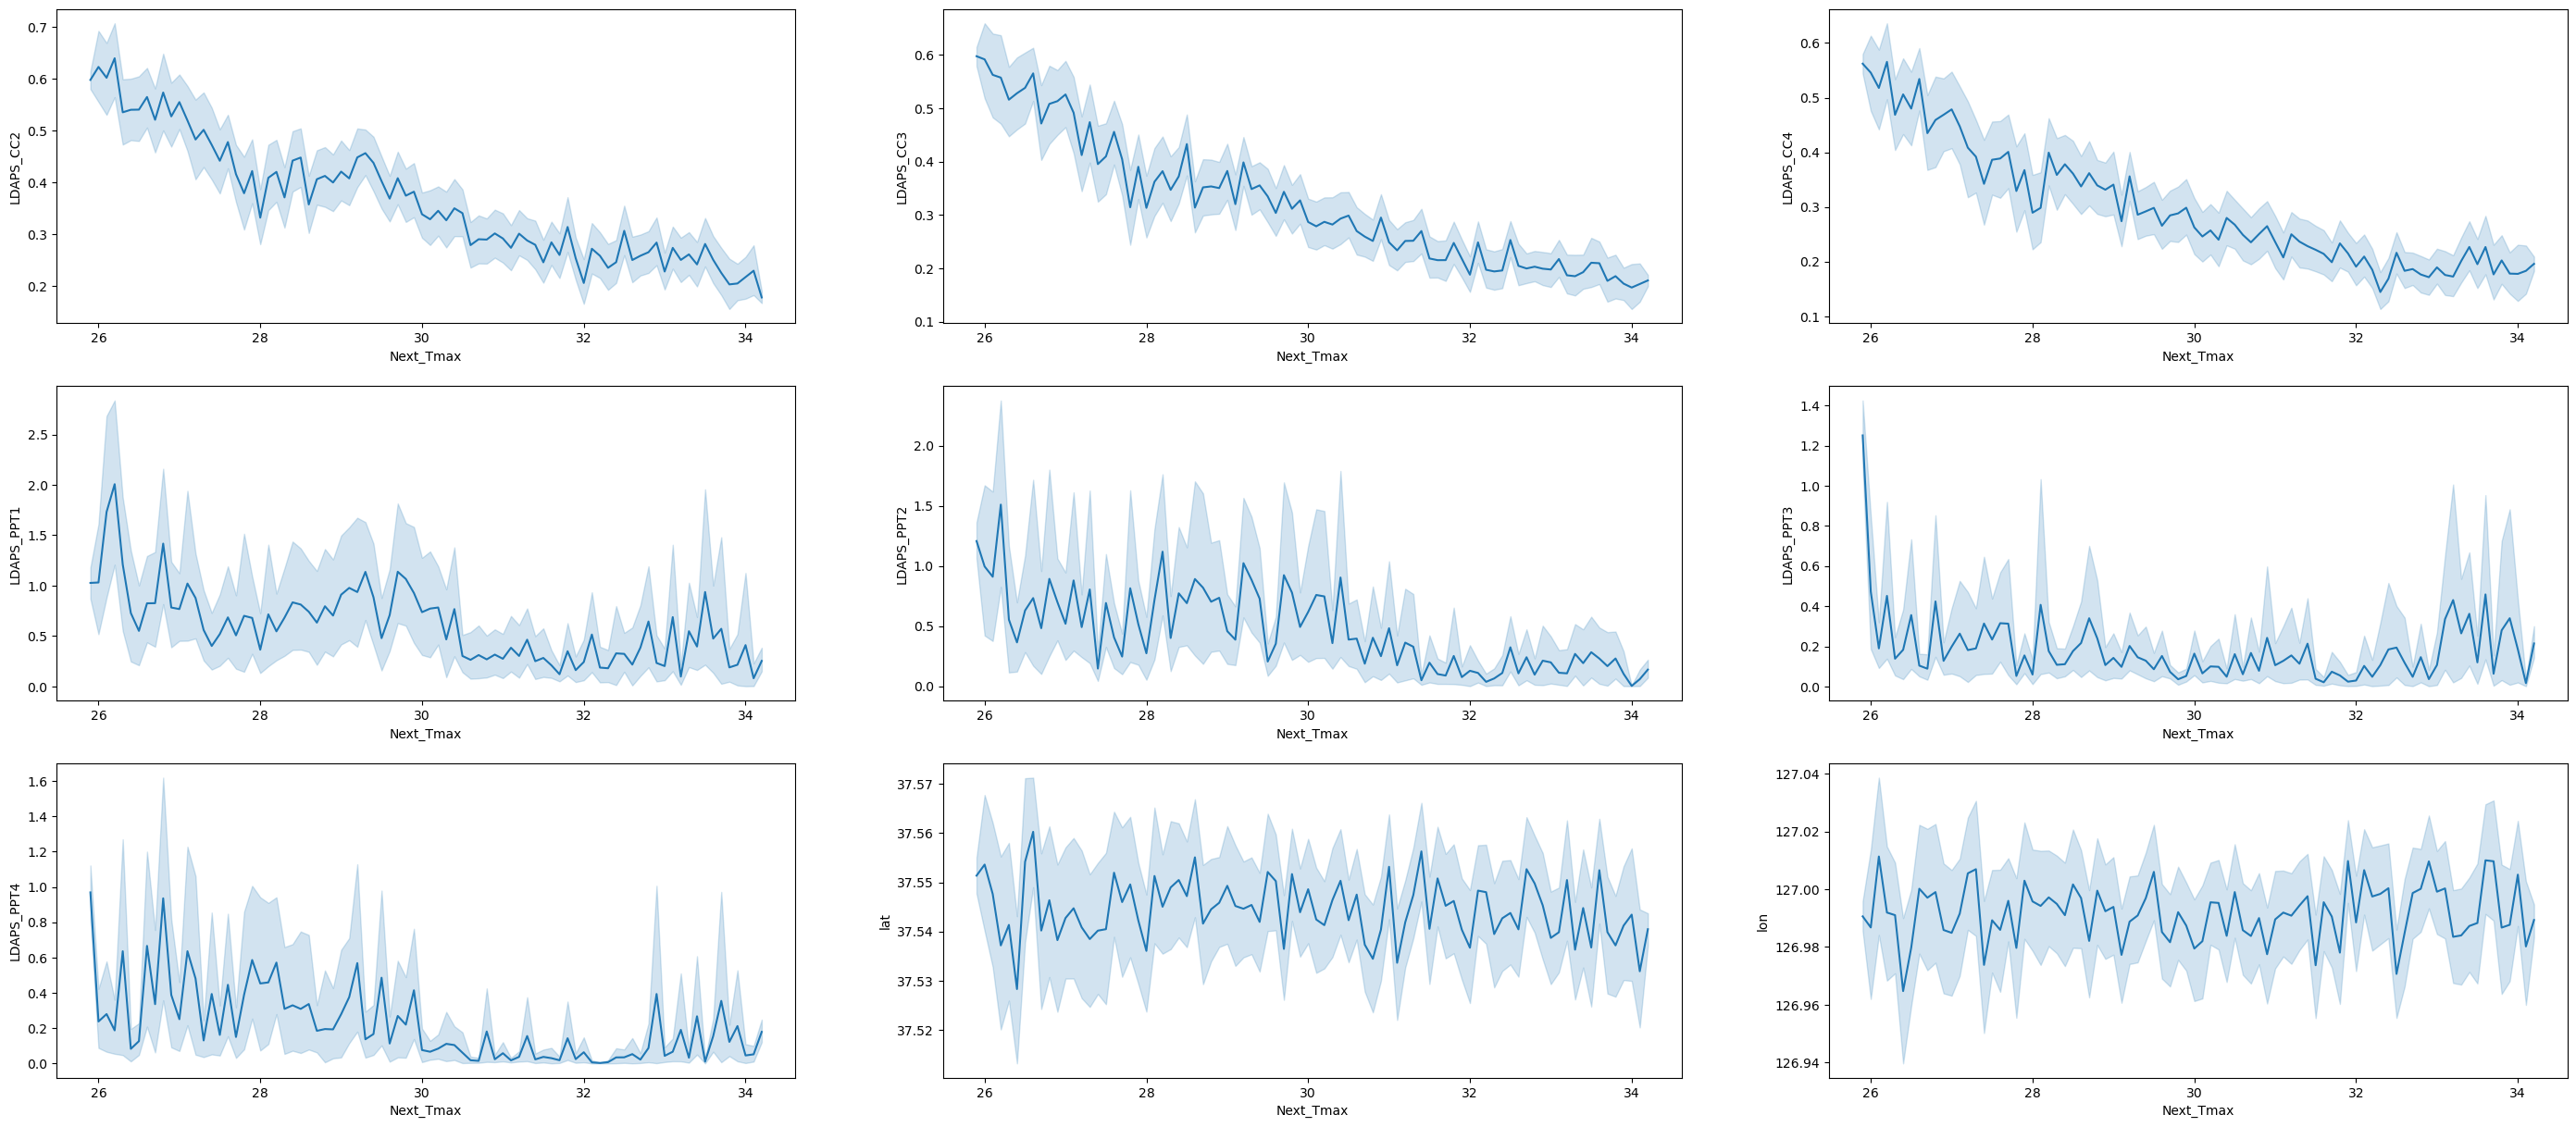

In [145]:
fig, ax = plt.subplots(3, 3, figsize=(35,15))
sns.lineplot(y=df['LDAPS_CC2'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['LDAPS_CC3'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['LDAPS_CC4'], x=df['Next_Tmax'],ax=ax[0,2])
sns.lineplot(y=df['LDAPS_PPT1'], x=df['Next_Tmax'],ax=ax[1,0])
sns.lineplot(y=df['LDAPS_PPT2'], x=df['Next_Tmax'],ax=ax[1,1])
sns.lineplot(y=df['LDAPS_PPT3'], x=df['Next_Tmax'],ax=ax[1,2])
sns.lineplot(y=df['LDAPS_PPT4'], x=df['Next_Tmax'],ax=ax[2,0])
sns.lineplot(y=df['lat'], x=df['Next_Tmax'],ax=ax[2,1])
sns.lineplot(y=df['lon'], x=df['Next_Tmax'],ax=ax[2,2])
plt.show()

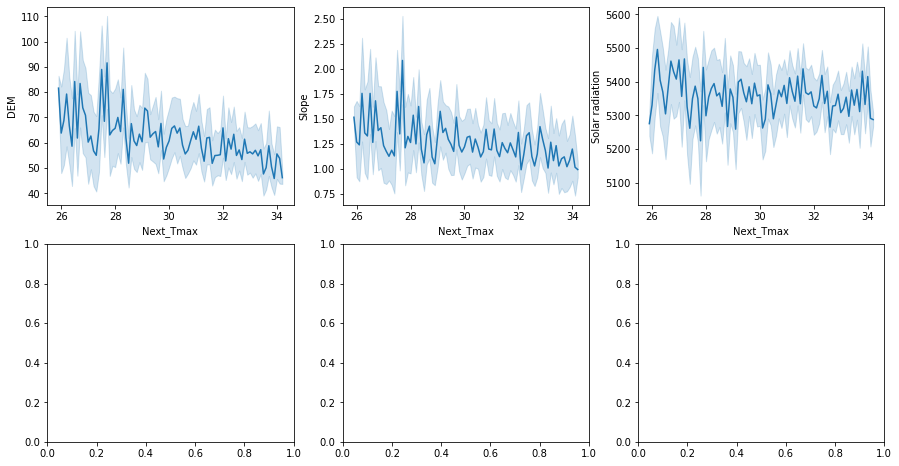

In [109]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))
sns.lineplot(y=df['DEM'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['Slope'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['Solar radiation'], x=df['Next_Tmax'],ax=ax[0,2])
plt.show()

## Model development

In [14]:
# importing module for model development.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn import metrics

In [42]:
# defining variable for train test split.
df.reset_index(drop=True, inplace=True)
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [46]:
# creating train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [111]:
# building the first model with Linear Regression.
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)

# # printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], predlr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], predlr[:,-2]))))

RMSE: 0.9527791180208404
RMSE: 1.3254175876890402


Text(0, 0.5, 'Predictions')

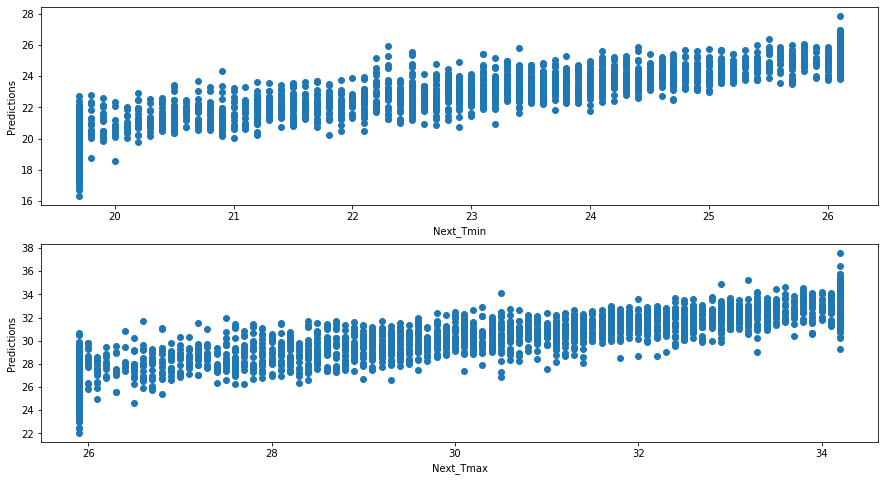

In [112]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], predlr[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], predlr[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [114]:
# creating second model using decision tree regressor.
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], pred_dtr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], pred_dtr[:,-2]))))

RMSE: 1.0549131663213207
RMSE: 1.3854823993590797


Text(0, 0.5, 'Predictions')

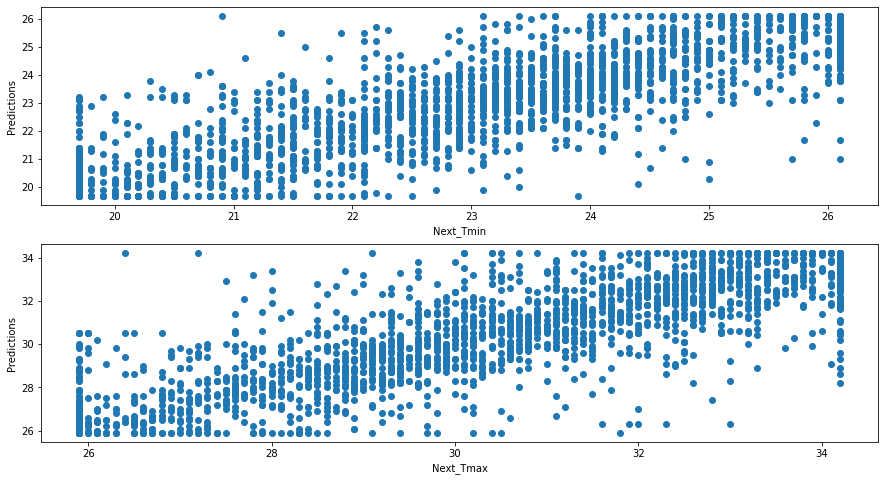

In [118]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], pred_dtr[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], pred_dtr[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [138]:
# creating third model using random K-Neighbors
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], pred_knn[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], pred_knn[:,-2]))))

RMSE: 1.4442896720955096
RMSE: 1.8997147815066364


Text(0, 0.5, 'Predictions')

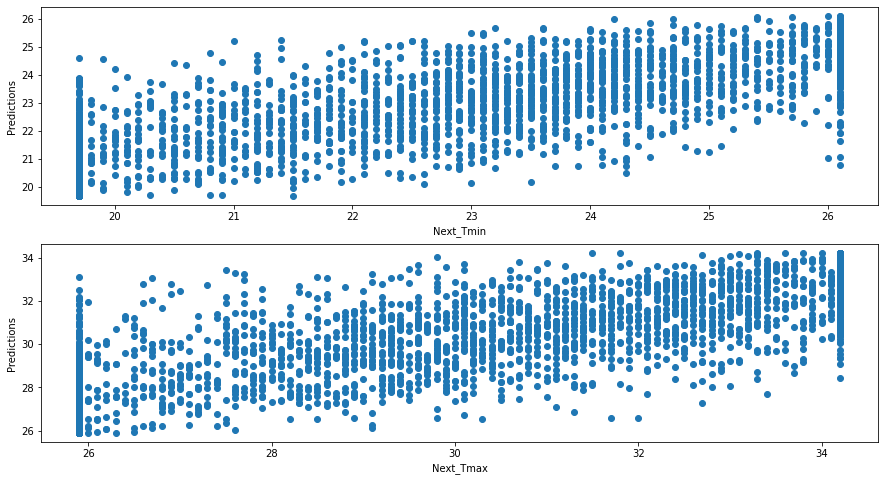

In [139]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], pred_knn[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], pred_knn[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [123]:
# creating fourth model using linear svr with the help of scikit learn multioutput algorithm.

# defining base model
svr = LinearSVR()

#define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(svr)
wrapper.fit(x_train, y_train)
pred_svr = wrapper.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], pred_svr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], pred_svr[:,-2]))))

RMSE: 1.5571477176759743
RMSE: 2.7765282487601475


Text(0, 0.5, 'Predictions')

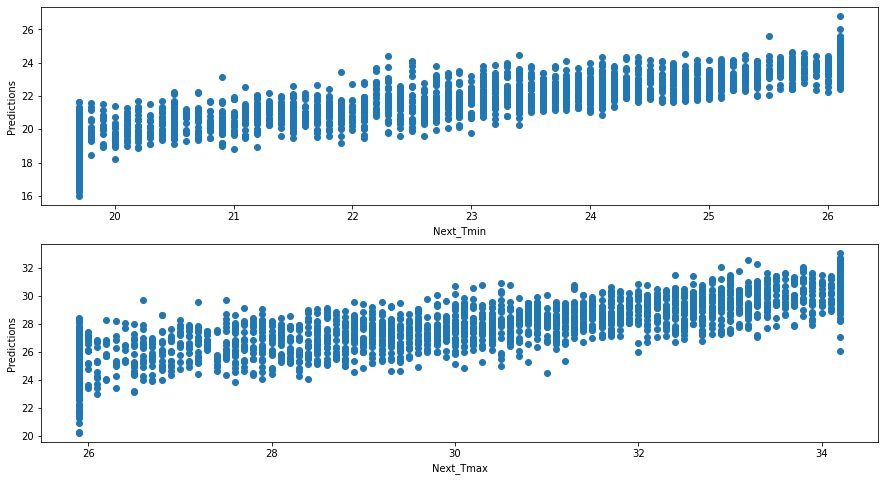

In [145]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], pred_svr[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], pred_svr[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

* We can seethat the model LinearRegression performs well as it has the minium root mean squared error.

## Checking cross val score 

In [128]:
#importing cross val score module
from sklearn.model_selection import cross_val_score
# imporing kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [135]:
# using cross val for Linear Regression model.
lr_cv = cross_val_score(LinearRegression(), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(lr_cv.mean())
print(result)

1.2409727793637324


In [137]:
# using cross val for decision tree regressor
dtr_cv = cross_val_score(DecisionTreeRegressor(), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(dtr_cv.mean())
print(result)

1.6827899816630676


In [140]:
# using cross val for K-Neighbors Regressor
knn_cv = cross_val_score(KNeighborsRegressor(), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(knn_cv.mean())
print(result)

2.0982517290655918


In [142]:
# using cross val for Support vector regressor
svr_cv = cross_val_score(MultiOutputRegressor(LinearSVR()), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(svr_cv.mean())
print(result)

1.5712939881891694


* Here our LinearRegression also performs better than other models.
* So we will do hyperparameter tuning for the LinearRegression

## Hyperparameter tuning

In [144]:
# importing grid search cv
from sklearn.model_selection import GridSearchCV

In [155]:
# creating parameters for the tuning
param_grid = {'fit_intercept':['True', 'False'],
             'normalize':['True', 'False'],
             'n_jobs':['None', 1],
             'positive':['True', 'False']}

In [156]:
# passing the created parameters to GridSearchCV
GCV = GridSearchCV(LinearRegression(), param_grid, cv=kfold)
GCV.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': ['None', 1], 'normalize': ['True', 'False'],
                         'positive': ['True', 'False']})

In [157]:
#getting best parameters
GCV.best_params_

{'fit_intercept': 'True', 'n_jobs': 1, 'normalize': 'True', 'positive': 'True'}

In [161]:
# building the model with best parameters
tuned_model = LinearRegression(fit_intercept=True, n_jobs=1, normalize=True, positive=True)
tuned_model.fit(x_train, y_train)
prediction = tuned_model.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], prediction[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], prediction[:,-2]))))

RMSE: 0.987168503421765
RMSE: 1.436399046500537


Text(0, 0.5, 'Predictions')

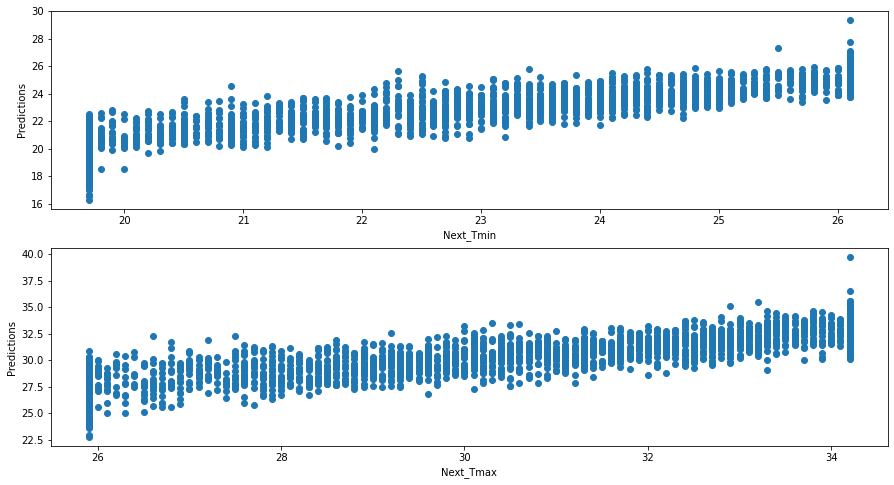

In [164]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], prediction[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], prediction[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

### Checking how much our prediction are correct

In [170]:
result = pd.DataFrame({'Prediction(Next_Tmin)':prediction[:,-1],
                     'Next_Tmin':y_test.iloc[:,-1],
                     'Prediction(Next_Tmax)':prediction[:,-2],
                     'Next_Tmax':y_test.iloc[:,-2]})

In [171]:
result

Prediction(Next_Tmin)  Next_Tmin  Prediction(Next_Tmax)  Next_Tmax
1530              22.199659       21.4              29.271112       28.4
5293              25.269659       24.2              31.894060       32.1
6137              18.551623       19.7              27.639517       26.1
5386              23.668105       25.0              30.051448       33.3
2694              20.163375       20.0              28.014015       28.5
...                     ...        ...                    ...        ...
271               23.559072       24.1              29.258360       26.1
4953              22.427347       23.3              29.938181       30.1
3429              22.215416       22.8              31.000294       31.9
1147              25.915587       26.1              32.616508       34.2
866               24.409412       24.2              32.756141       32.0

[2326 rows x 4 columns]

### Saving our model

In [174]:
import joblib
joblib.dump(tuned_model, 'Temperature.pkl')

['Temperature.pkl']

### Loading the saved model

In [175]:
save = joblib.load('Temperature.pkl')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

Mean Absolute Error: 0.9460526677846155
Mean Squared Error: 1.5188719374678075
Root Mean Squared Error: 1.2324252259134456


In [176]:
prediction

array([[29.27111235, 22.19965917],
       [31.89405979, 25.26965928],
       [27.63951739, 18.5516225 ],
       ...,
       [31.00029403, 22.21541597],
       [32.61650777, 25.91558677],
       [32.75614091, 24.40941229]])